In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
df = pd.read_json("bio_data.json")


# Q1 - Un camembert de répartition femme / homme dans l’échantillon.

In [22]:
df['gender_male_female'] = df['gender_male_female'].astype(int)
df['g'] = df['gender_male_female'].map({1: 'male', 0: 'female'})
fig = px.pie(df, names='g', width=600, height=600, title='Répartition des hommes et des femmes dans l\'échantillon.')
fig.show()

# Q2 - Un camembert de répartition de l’échantillon par tranche d’age de 5 ans.

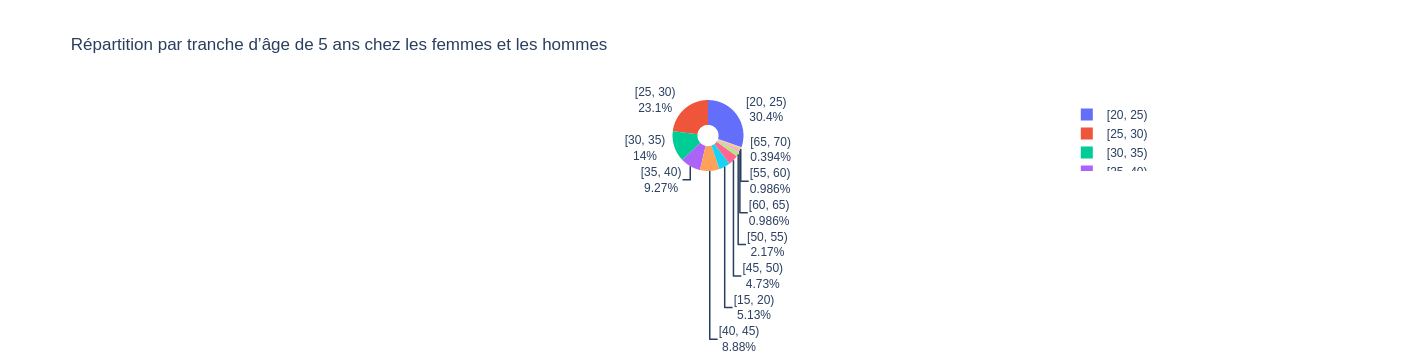

In [23]:
group_names = [f"{i}-{i+4}" for i in range(0, 100, 5)]
bins = range(0, 101, 5)

### # Créez des tranches d'âge de 5 ans en utilisant la fonction cut de pandas
df["age_slice"]= pd.cut(df["age_years"], bins, right=False).astype(str)

# Créer un camembert avec Plotly Express pour la répartition par tranche d'âge des femmes
fig = px.pie(df,names= 'age_slice',
             title='Répartition par tranche d’âge de 5 ans chez les femmes et les hommes',
             labels={'value': 'Nombre de femmes', 'index': 'Tranche d’âge'})

fig.update_traces(textinfo='percent+label', hole=0.3)

# Afficher le camembert
fig.show()

# Q3 - Le même camembert avec pour chaque tranche une distinction femme / homme .

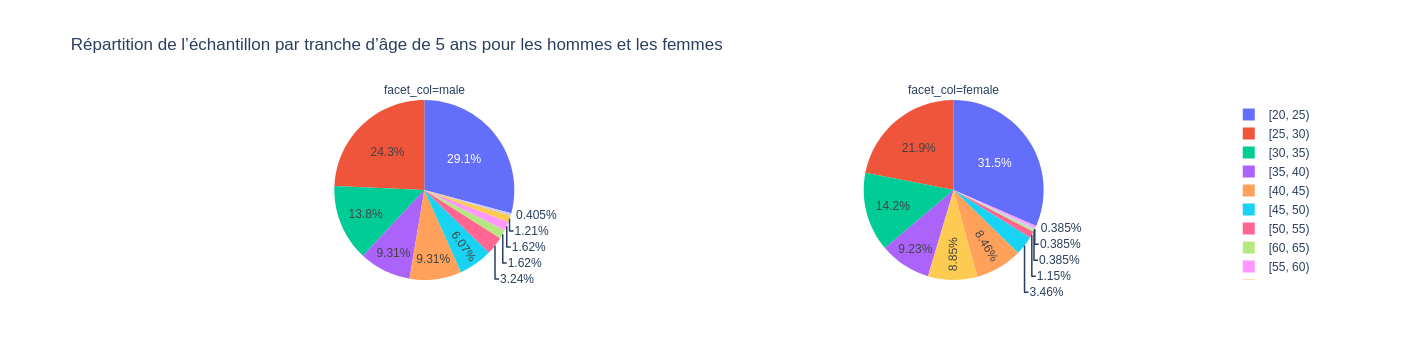

In [24]:
# Créez des tranches d'âge de 5 ans en utilisant la fonction cut de pandas et convertissez en chaînes de caractères
df['age_slice'] = pd.cut(df['age_years'], bins=range(0, 100, 5), right=False).astype(str)

# Créez des camemberts séparés pour chaque tranche d'âge de 5 ans pour les hommes et les femmes
fig = px.pie(df, names='age_slice', title='Répartition de l’échantillon par tranche d’âge de 5 ans pour les hommes et les femmes',
             facet_col= df['gender_male_female'].map({1: 'male', 0: 'female'}), category_orders={"gender_male_female": ["male", "female"]})

# Afficher le camembert
fig.show()

# Q4 - Histogramme des tailles des femmes (au cm près)

In [25]:
df_filtered = df[df['gender_male_female'] == 0]

fig = px.histogram(df_filtered, x='height_cm', nbins=20, title='Histogramme de la taille des femmes')
fig.show()

# Q5 - Histogramme des tailles des hommes (au cm près)

In [26]:
df_filtered = df[df['gender_male_female'] == 1]

fig = px.histogram(df_filtered, x='height_cm', nbins=len(df_filtered['height_cm'].unique()), title='Histogramme de la taille des hommes')
fig.show()

# Q6 - Un histogramme qui compare les deux histogrammes;

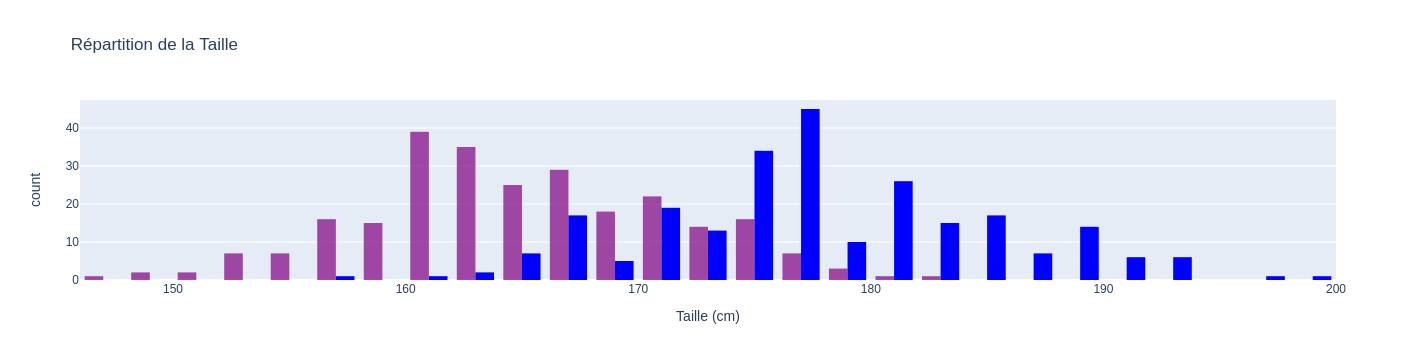

In [27]:
df_femme = df[df['gender_male_female'] == 0]
df_homme = df[df['gender_male_female'] == 1]

fig = px.histogram(df_femme, x='height_cm', title='Répartition de la Taille',
                   labels={'height_cm': 'Taille (cm)'}, barmode='group', color_discrete_sequence=['purple'])
fig.update_traces(opacity=0.7) 

fig.add_trace(px.histogram(df_homme, x='height_cm', title='Répartition de la Taille',
                            barmode='group', color_discrete_sequence=['blue']).data[0])
fig.show()

# Q7 - Courbe de croissance moyenne (taille moyenne en fonction de l’age)

In [28]:

df['height_cm'] = df['height_cm'].round(0)
df_grp = df.groupby('age_years')['height_cm'].mean().reset_index()

fig = px.line(df_grp, x="age_years", y="height_cm", title='Courbe de croissance moyenne en fonction de l\'âge')
fig.show()

# Q8 - Idem mais avec le poids

In [29]:
df_grp = df.groupby('age_years')['weight_kg'].mean().reset_index()

fig = px.line(df_grp, x="age_years", y="weight_kg", title='Courbe de croissance moyenne en fonction du poids')
fig.show()

# Q9 - Un nuage de points des tailles en fonction de l’age

In [30]:
fig = px.scatter(df, x="age_years", y="height_cm", title='Nuage de points de la taille moyenne en fonction de l\'âge')
fig.show()

# Q10 - Un histogramme qui compare la taille du biceps en fonction de la taille ;

In [31]:
df['height_cm'] = df['height_cm'].round(0)
df_grp = df.groupby('height_cm')['bicep_girth'].mean().reset_index()


fig = px.bar(df_grp, x='height_cm', y='bicep_girth', title='Comparaison de la taille du biceps en fonction de la taille',
                   labels={'height_cm': 'Taille (cm)', 'bicep_girth': 'Taille du biceps (cm)'}) 

fig.show()

# Q11 - Idem mais en fonction de l’age

In [32]:
df_grp = df.groupby('age_years')['bicep_girth'].mean().reset_index()

fig = px.bar(df_grp, x='age_years', y='bicep_girth', title='Comparaison de la taille du biceps en fonction de l\'âge',
                   labels={'age_years': 'Âge', 'bicep_girth': 'Taille du biceps (cm)'}) 

fig.show()

# Q12 - Un histogramme qui compare la moyenne de la taille des biceps des femmes et des hommes

In [33]:
# Filtrer les données pour les hommes et les femmes
df_women = df[df['gender_male_female'] == 0]  # Filtrer les femmes
df_men = df[df['gender_male_female'] == 1]  # Filtrer les hommes

# Calculer la moyenne de la taille des biceps pour les femmes et les hommes
mean_bicep_women = df_women['bicep_girth'].mean()
mean_bicep_men = df_men['bicep_girth'].mean()

# Créer un histogramme comparant la moyenne de la taille des biceps entre hommes et femmes
fig = px.histogram(df, x='bicep_girth', color='gender_male_female', 
                   opacity=0.7, barmode='group',
                   labels={'bicep_girth': 'Taille des biceps', 'gender_male_female': 'Genre'},
                   title='Comparaison de la moyenne de la taille des biceps entre hommes et femmes')

fig.update_layout(bargap=0.1)  # Ajuster l'espacement entre les barres

# Ajouter des lignes verticales représentant la moyenne pour chaque groupe
fig.add_vline(x=mean_bicep_women, line_dash="dash", line_color="blue", annotation_text=f"Mean Women: {mean_bicep_women:.2f}", annotation_position="top left")
fig.add_vline(x=mean_bicep_men, line_dash="dash", line_color="red", annotation_text=f"Mean Men: {mean_bicep_men:.2f}", annotation_position="top right")

# Afficher l'histogramme
fig.show()

# Q13 - Un nuage de points des poids en fonction de l’age. Avec des couleurs différentes pour les femmes et les hommes

In [34]:
df['gender'] = df['gender_male_female'].map({1: 'Homme', 0: 'Femme'})

fig = px.scatter(df, x="age_years", y="weight_kg", color="gender", symbol="gender",
                 title='Nuage de points de la taille moyenne en fonction de l\'âge',
                 color_discrete_map={'Homme': 'green', 'Femme': 'purple'})

fig.show()

# Q14 - Pour chaque personne, calculer la moyenne des différences entre 58 - 62 et 64 – 68 et entre 64 – 68 et 70 – 74. 
# Puis calculer la moyenne de ces moyennes pour les femmes et pour les hommes. Puis afficher ces deux valeurs dans un histogramme

In [35]:
df['diff_A'] = (df['waist_girth'] - df['navel_girth']).abs()
df['diff_B'] = (df['hip_girth_diameter'] - df['navel_girth']).abs()

mean_diff_A = df['diff_A'].mean()
mean_diff_B = df['diff_B'].mean()

print('la moyenne des différences entre waist_girth et navel_girth :', mean_diff_A)
print('la moyenne des différences entre hip_girth_diameter et navel_girth :', mean_diff_B)
print('-----')
df['avg_diff'] = df[['diff_A', 'diff_B']].mean(axis=1)

avg_diffA_gender = df.groupby('gender_male_female')['diff_A'].mean()
avg_diffB_gender = df.groupby('gender_male_female')['diff_B'].mean()

print("Moyenne des différences entre waist_girth et navel_girth, pour les femmes :", avg_diffA_gender[0])
print("Moyenne des différences entre entre waist_girth et navel_girth, pour les hommes :", avg_diffA_gender[1])
print("Moyenne des différences entre hip_girth_diameter et navel_girth, pour les femmes :", avg_diffB_gender[0])
print("Moyenne des différences entre hip_girth_diameter et navel_girth, pour les hommes :", avg_diffB_gender[1])
avg_diff_gender = df.groupby('gender_male_female').agg({'diff_A': 'mean', 'diff_B': 'mean'}).reset_index()

fig = px.bar(avg_diff_gender, x='gender_male_female', y=['diff_A', 'diff_B'],
             labels={'gender_male_female': 'Genre', 'value': 'Moyenne'},
             title='Moyenne entre waist_girth et navel_girth (diff_A) et entre hip_girth_diameter et navel_girth par genre (diff_B)',
             barmode='group')
fig.show()

la moyenne des différences entre waist_girth et navel_girth : 9.094871794871796
la moyenne des différences entre hip_girth_diameter et navel_girth : 11.084615384615384
-----
Moyenne des différences entre waist_girth et navel_girth, pour les femmes : 13.957692307692307
Moyenne des différences entre entre waist_girth et navel_girth, pour les hommes : 3.9761133603238865
Moyenne des différences entre hip_girth_diameter et navel_girth, pour les femmes : 11.986153846153847
Moyenne des différences entre hip_girth_diameter et navel_girth, pour les hommes : 10.135627530364372


# Q15 - Que peut on conclure des informations de la question 12 ?

In [36]:
print('La moyenne de la taille des biceps est significativement différente entre hommes et femmes, cela peut indiquer une différence typique dans le développement musculaire ou la structure corporelle entre les genres.Les hommes ont tendance à avoir une masse musculaire supérieure à celle des femmes en raison de différences physiologiques et hormonales.')

La moyenne de la taille des biceps est significativement différente entre hommes et femmes, cela peut indiquer une différence typique dans le développement musculaire ou la structure corporelle entre les genres.Les hommes ont tendance à avoir une masse musculaire supérieure à celle des femmes en raison de différences physiologiques et hormonales.


La moyenne de la taille des biceps est significativement différente entre hommes et femmes,
cela peut indiquer une différence typique dans le développement musculaire ou la structure corporelle entre les genres.
Les hommes ont tendance à avoir une masse musculaire supérieure à celle des femmes en raison de différences physiologiques et hormonales.

# Q16 - Est-ce que la taille des genoux est proportionnelle à la taille (hauteur) ? Créer un diagramme qui démontre votre réponse

In [4]:
df = pd.read_json("bio_data.json")

# Créer le diagramme de dispersion avec Plotly Express
fig = px.scatter(df, x='height_cm', y='knee_diameter', title='Relation entre la taille des genoux et la hauteur', trendline= "ols")
fig.update_traces(marker=dict(size=12, color='blue'))  # Ajuster la taille et la couleur des marqueurs

# Ajouter des titres aux axes
fig.update_xaxes(title_text='Hauteur (cm)')
fig.update_yaxes(title_text='Taille des genoux (cm)')

# Afficher le diagramme de dispersion
fig.show()

# Q17 - Calculer l’IMC de chaque personne et afficher dans un tableau : Taille, Poids, IMC, pour les personnes dont l’IMC > 20 

In [38]:
df['height_m'] = (df['height_cm']/100)
df['IMC'] = df['weight_kg']/(df['height_m']*df['height_m'])
df_IMC = df[df['IMC'] > 20]

fig = go.Figure(data=[go.Table(
    header=dict(values=["Height (cm)", "Weight (kg)", "IMC"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_IMC['height_cm'], df_IMC['weight_kg'], df_IMC['IMC']],
               fill_color='lavender',
               align='left'))
])

fig.show()

# Q18 - Est-ce que les personnes de plus de 30 ans ont de plus grosses chevilles que les autres ? Créer un diagramme qui démontre votre réponse

In [39]:
grouped_data = df.groupby('age_years')['ankle_diameter'].agg(['count', 'mean']).reset_index()

fig = px.bar(grouped_data, x='age_years', y='mean', title='Répartition de la Taille',
                   labels={'mean': 'Moyenne du Diamètre des chevilles (cm)'}, color_discrete_sequence=['blue'])

fig.show()

# Q19 - Est-ce que les personnes qui ont un IMC > 20 ont de plus grosses chevilles que les autres Créer un diagramme qui démontre votre réponse

In [7]:
df['height_m'] = (df['height_cm'] / 100)
df['IMC'] = df['weight_kg'] / (df['height_m'] * df['height_m'])

fig = px.scatter(df, x='IMC', y='ankle_diameter',
                 title='Comparaison des Diamètres de Cheville pour les personnes avec un IMC > 20',
                 labels={'ankle_diameter': 'Diamètre des Chevilles (cm)', 'IMC': 'IMC'}, trendline= "ols")

fig.show()

# Q20 - La taille du coude est-elle liée à la taille de la cheville ? Créer un diagramme qui démontre votre réponse

In [6]:
df = pd.read_json("bio_data.json")

# Créer le diagramme de dispersion avec Plotly Express
fig = px.scatter(df, x='ankle_diameter', y='elbow_diameter', title='Relation entre la taille du coude et la taille de la cheville', trendline= "ols")
fig.update_traces(marker=dict(size=12, color='green'))  # Ajuster la taille et la couleur des marqueurs

# Ajouter des titres aux axes
fig.update_xaxes(title_text='Taille de la cheville')
fig.update_yaxes(title_text='Taille du coude')

# Afficher le diagramme de dispersion
fig.show()